Do a function to simulate a rolling dice 10 times and save the information in a dataframe.

In [1]:
import pandas as pd
import numpy as np
import random
%matplotlib inline

In [2]:
roll_list = []
minimum = 1
maximum = 6
for i in range(10):
    roll = random.randint(minimum, maximum)
    roll_list.append(roll)
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df = pd.DataFrame({'roll':roll_list}, index=index)
df

,roll
1,3
2,5
3,5
4,1
5,4
6,5
7,2
8,1
9,2
10,2


Plot the values sorted by value.

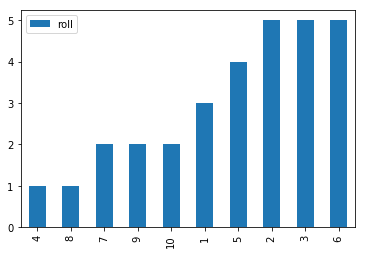

In [36]:
df[["roll"]].sort_values(by="roll").plot(kind="bar")

Calculate the frequency distribution and plot it. What is the relation between this plot and the other one? Describe it with words.

In [9]:
freq_df = df['roll'].value_counts()

In [10]:
freq_df

5    3
2    3
1    2
4    1
3    1
Name: roll, dtype: int64

In [13]:
freq_df = pd.DataFrame(data = freq_df).sort_index().reset_index().rename(columns={'index': 'score'})


In [14]:
freq_df

,score,roll
0,1,2
1,2,3
2,3,1
3,4,1
4,5,3


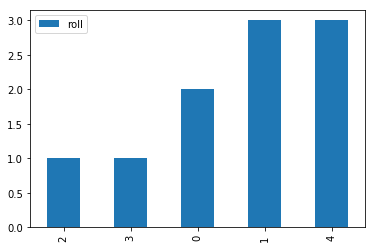

In [15]:
freq_df[["roll"]].sort_values(by='roll').plot(kind="bar")

In [28]:
all_rolls = pd.DataFrame(data = {'score': pd.Series(range(1,7))})


In [29]:
all_rolls

,score
0,1
1,2
2,3
3,4
4,5
5,6


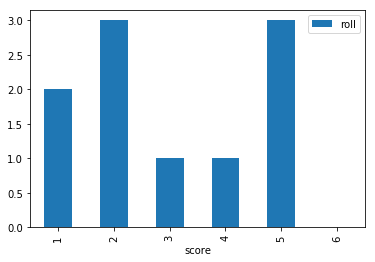

In [33]:
df1 = all_rolls.merge(freq_df, how='left').set_index("score").fillna(0)[['roll']].plot(kind='bar')


First plot shows ordered occurances, while the last one shows how often each occurance happened

### Challenge 2

With the results of your dice of the challenge 1, define some functions to calculate the mean in two ways:

Summing all the observations separately (no method allowed!)
Calculate first the frequency distribution and then the mean with the values of the distribution (no other methods allowed!)
Define a function to calculate the median. No method allowed! *Hint: depending on the number of observations you need to define two cases.
Using your last function, use it to define a function that will calculate the four quartiles.

In [68]:
def mean_freq(df.roll):
    freq_dict={}
    for i in df.roll:
        if i in freq_dict:
            freq_dict[i] += 1
        else:
            freq_dict[i] = 1
    freq_dict_multiplied = [key * val for key, val in freq_dict.items()]
    df_sum = 0
    for i in freq_dict_multiplied:
        df_sum +=i
    df_count = sum(freq_dict.values())
    return df_sum/df_count
mean_freq(df)

3.0

In [121]:
def mean_normal(df):
    df_sum = 0
    for i in df.roll:
        df_sum +=i
    df_count = 0
    for i in df.roll[:]:
        df_count += 1
    return df_sum/df_count
    
mean_normal(df)

3.0

In [125]:
def mean_normal(df):
    return df.sum()/df.count()

In [126]:
mean_normal(df)

roll    3.0
dtype: float64

In [238]:
def new_median(df):
    n = len(df["roll"])
    if n%2 == 0:
        return (df["roll"].sort_values().reset_index(drop = True)[n//2]+df["roll"].sort_values().reset_index(drop = True)[n//2+1])/2.0
    else:
        return df["roll"].sort_values().reset_index(drop = True)[n//2]
new_median(df)


3.5

In [239]:
print(df["roll"].sort_values().reset_index(drop = True))

0    1
1    1
2    2
3    2
4    2
5    3
6    4
7    5
8    5
9    5
Name: roll, dtype: int64


In [ ]:
print(df["roll"].sort_values().reset_index()[n//2:n//2+1]/2.0)
print((df["roll"].sort_values().reset_index()[n//2]+df["roll"].sort_values()[n//2+1])/2.0)
print(n)
print(df["roll"].sort_values())

Read the csv roll_the_dice_hundred.csv

Plot the values sorted. What do you see?
With the functions you defined in the challenge 2, calculate the mean of the rollings.
Calculate the frequency distribution.
Plot the histogram as we did during the lesson. What do you see? (shape, values...) how could you connect the value of the mean to the plot you see?
Now read the roll_the_dice_thousand.csv and plot the frequency distribution in the same way you did it before. What has changed? Why do you think it is changing?

In [168]:
roll = pd.read_csv("roll_the_dice_hundred.csv")
roll.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


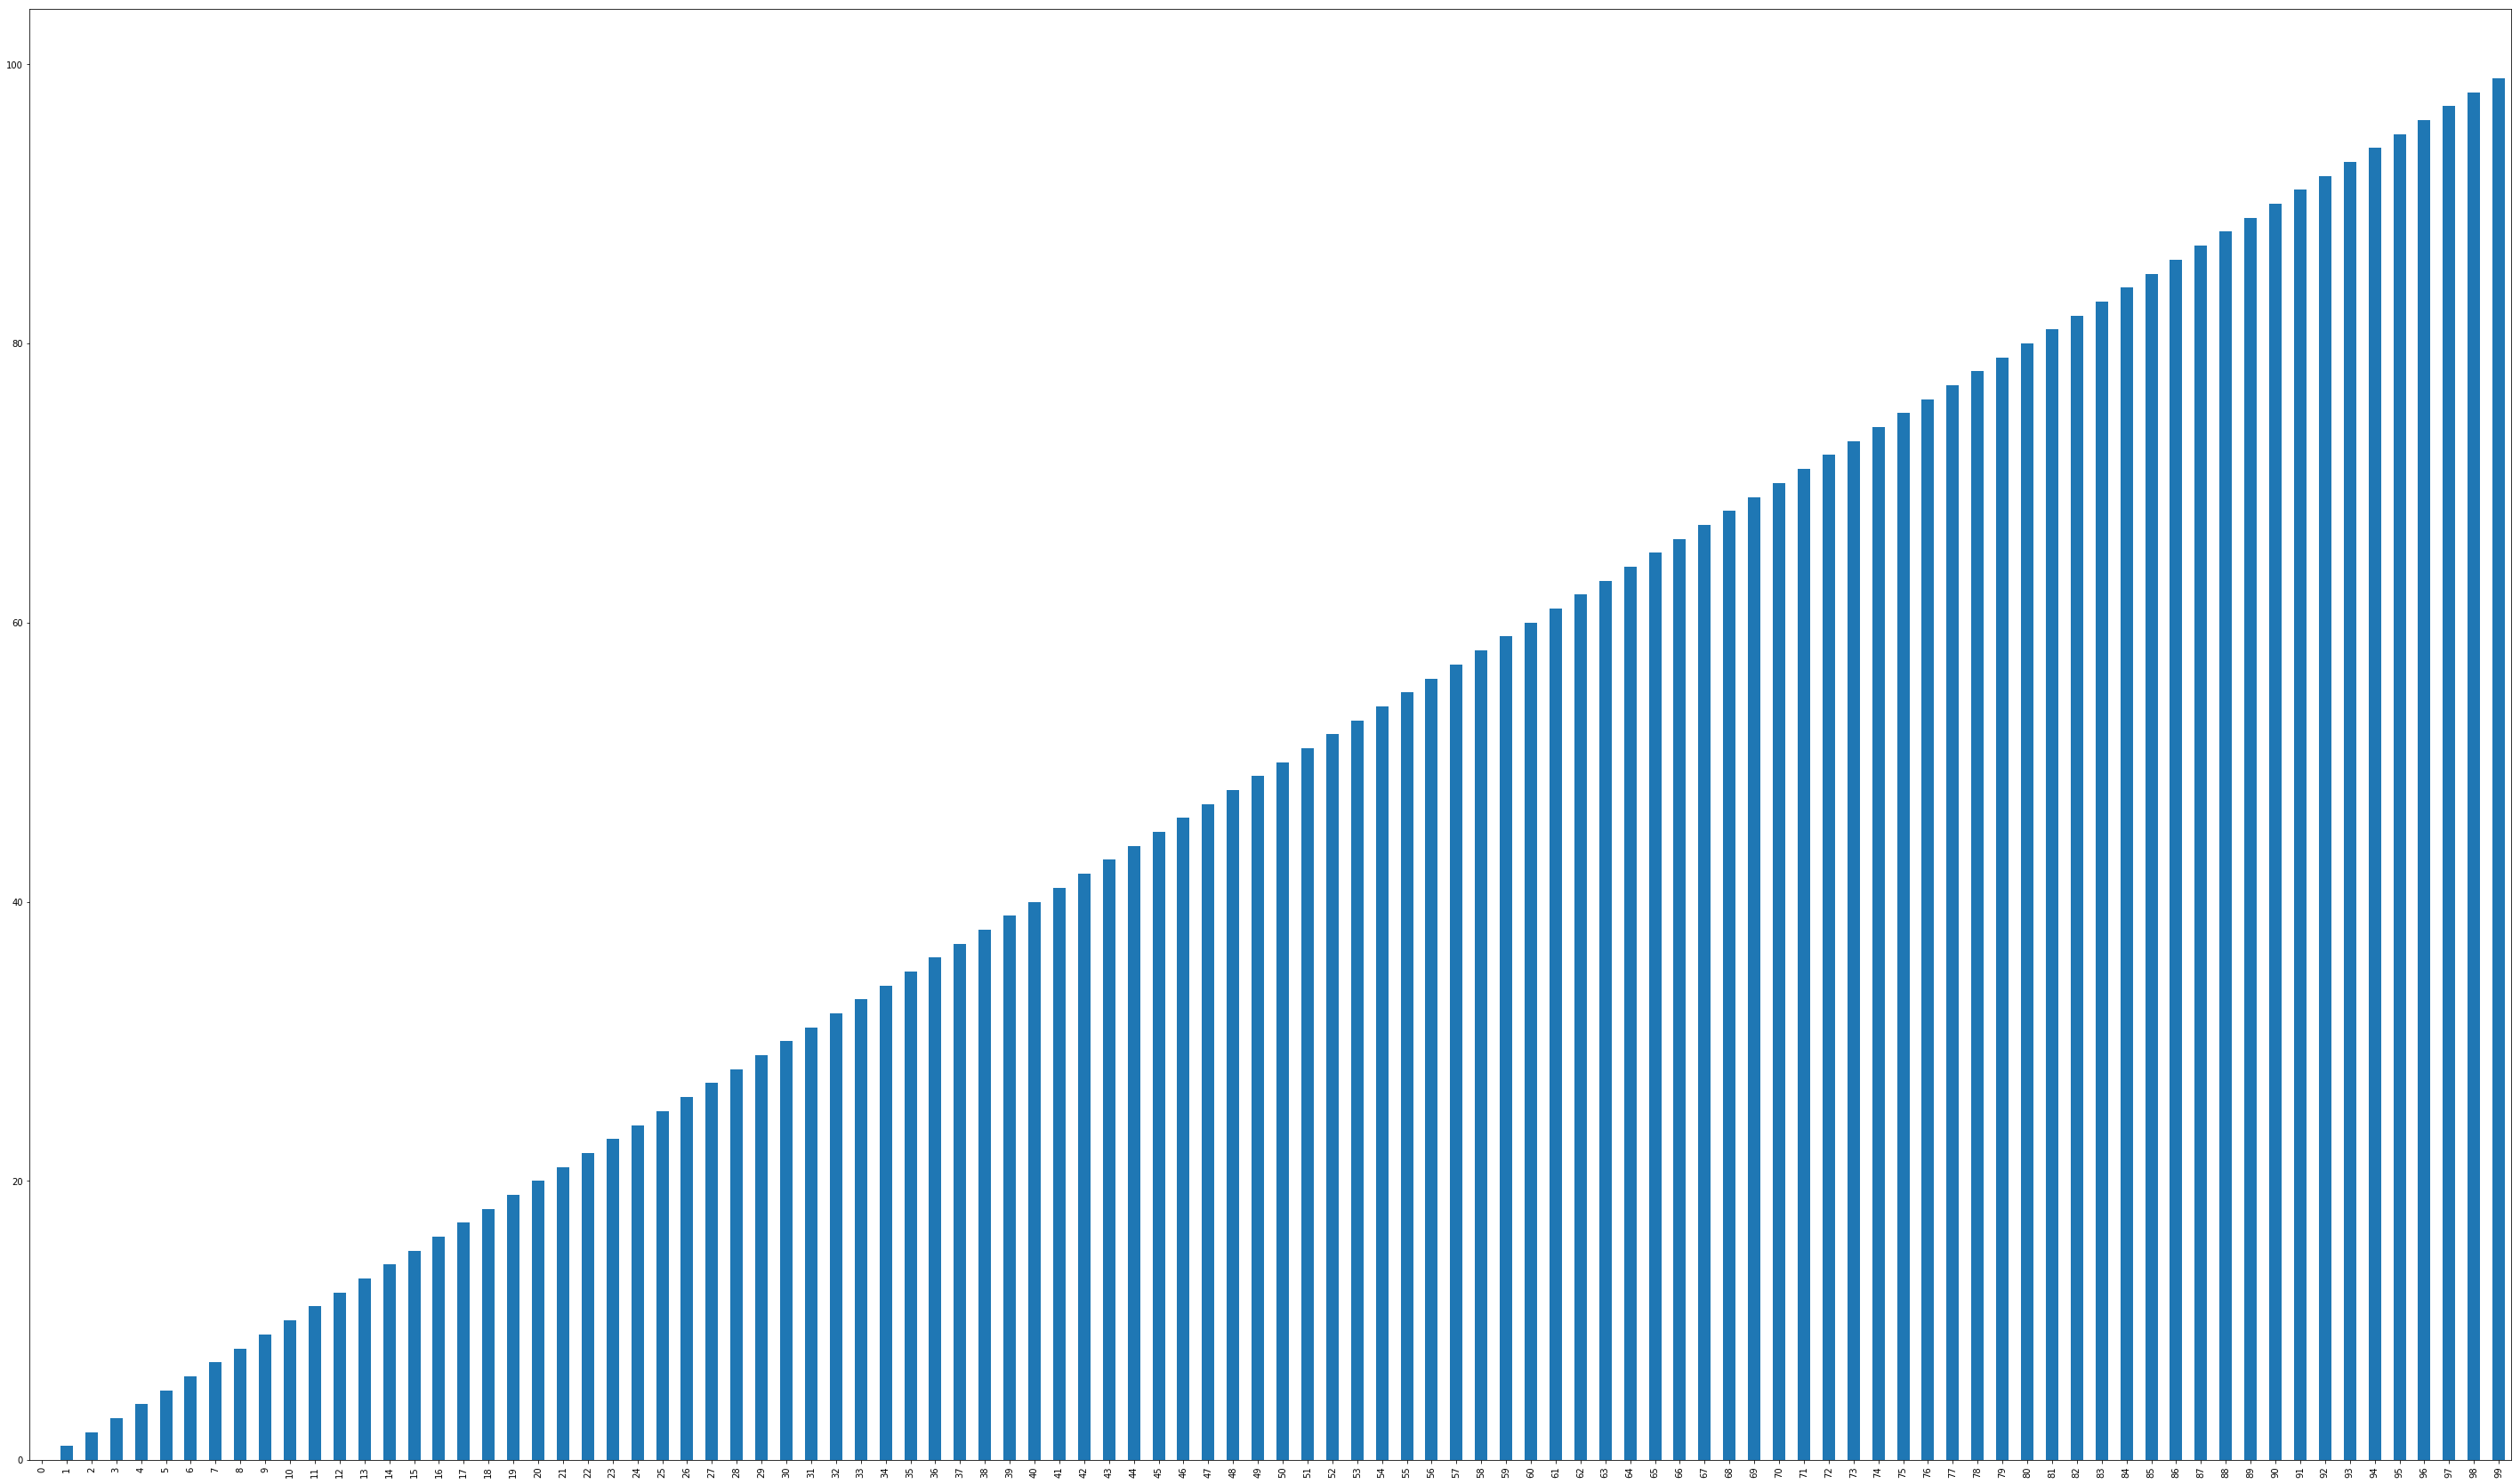

In [169]:
roll["roll"].sort_values().plot(kind="bar", figsize=(50,30))

In [170]:
mean_normal(roll["value"])

3.74

In [171]:
freq_df = roll['value'].value_counts()
freq_df = pd.DataFrame(data = freq_df).sort_index()
freq_df

,value
1,12
2,17
3,14
4,22
5,12
6,23


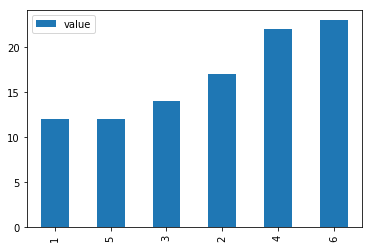

In [172]:
freq_df[["value"]].sort_values(by='value').plot(kind="bar")

In [173]:
roll1 = pd.read_csv("roll_the_dice_thousand.csv")
roll1.head()


,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


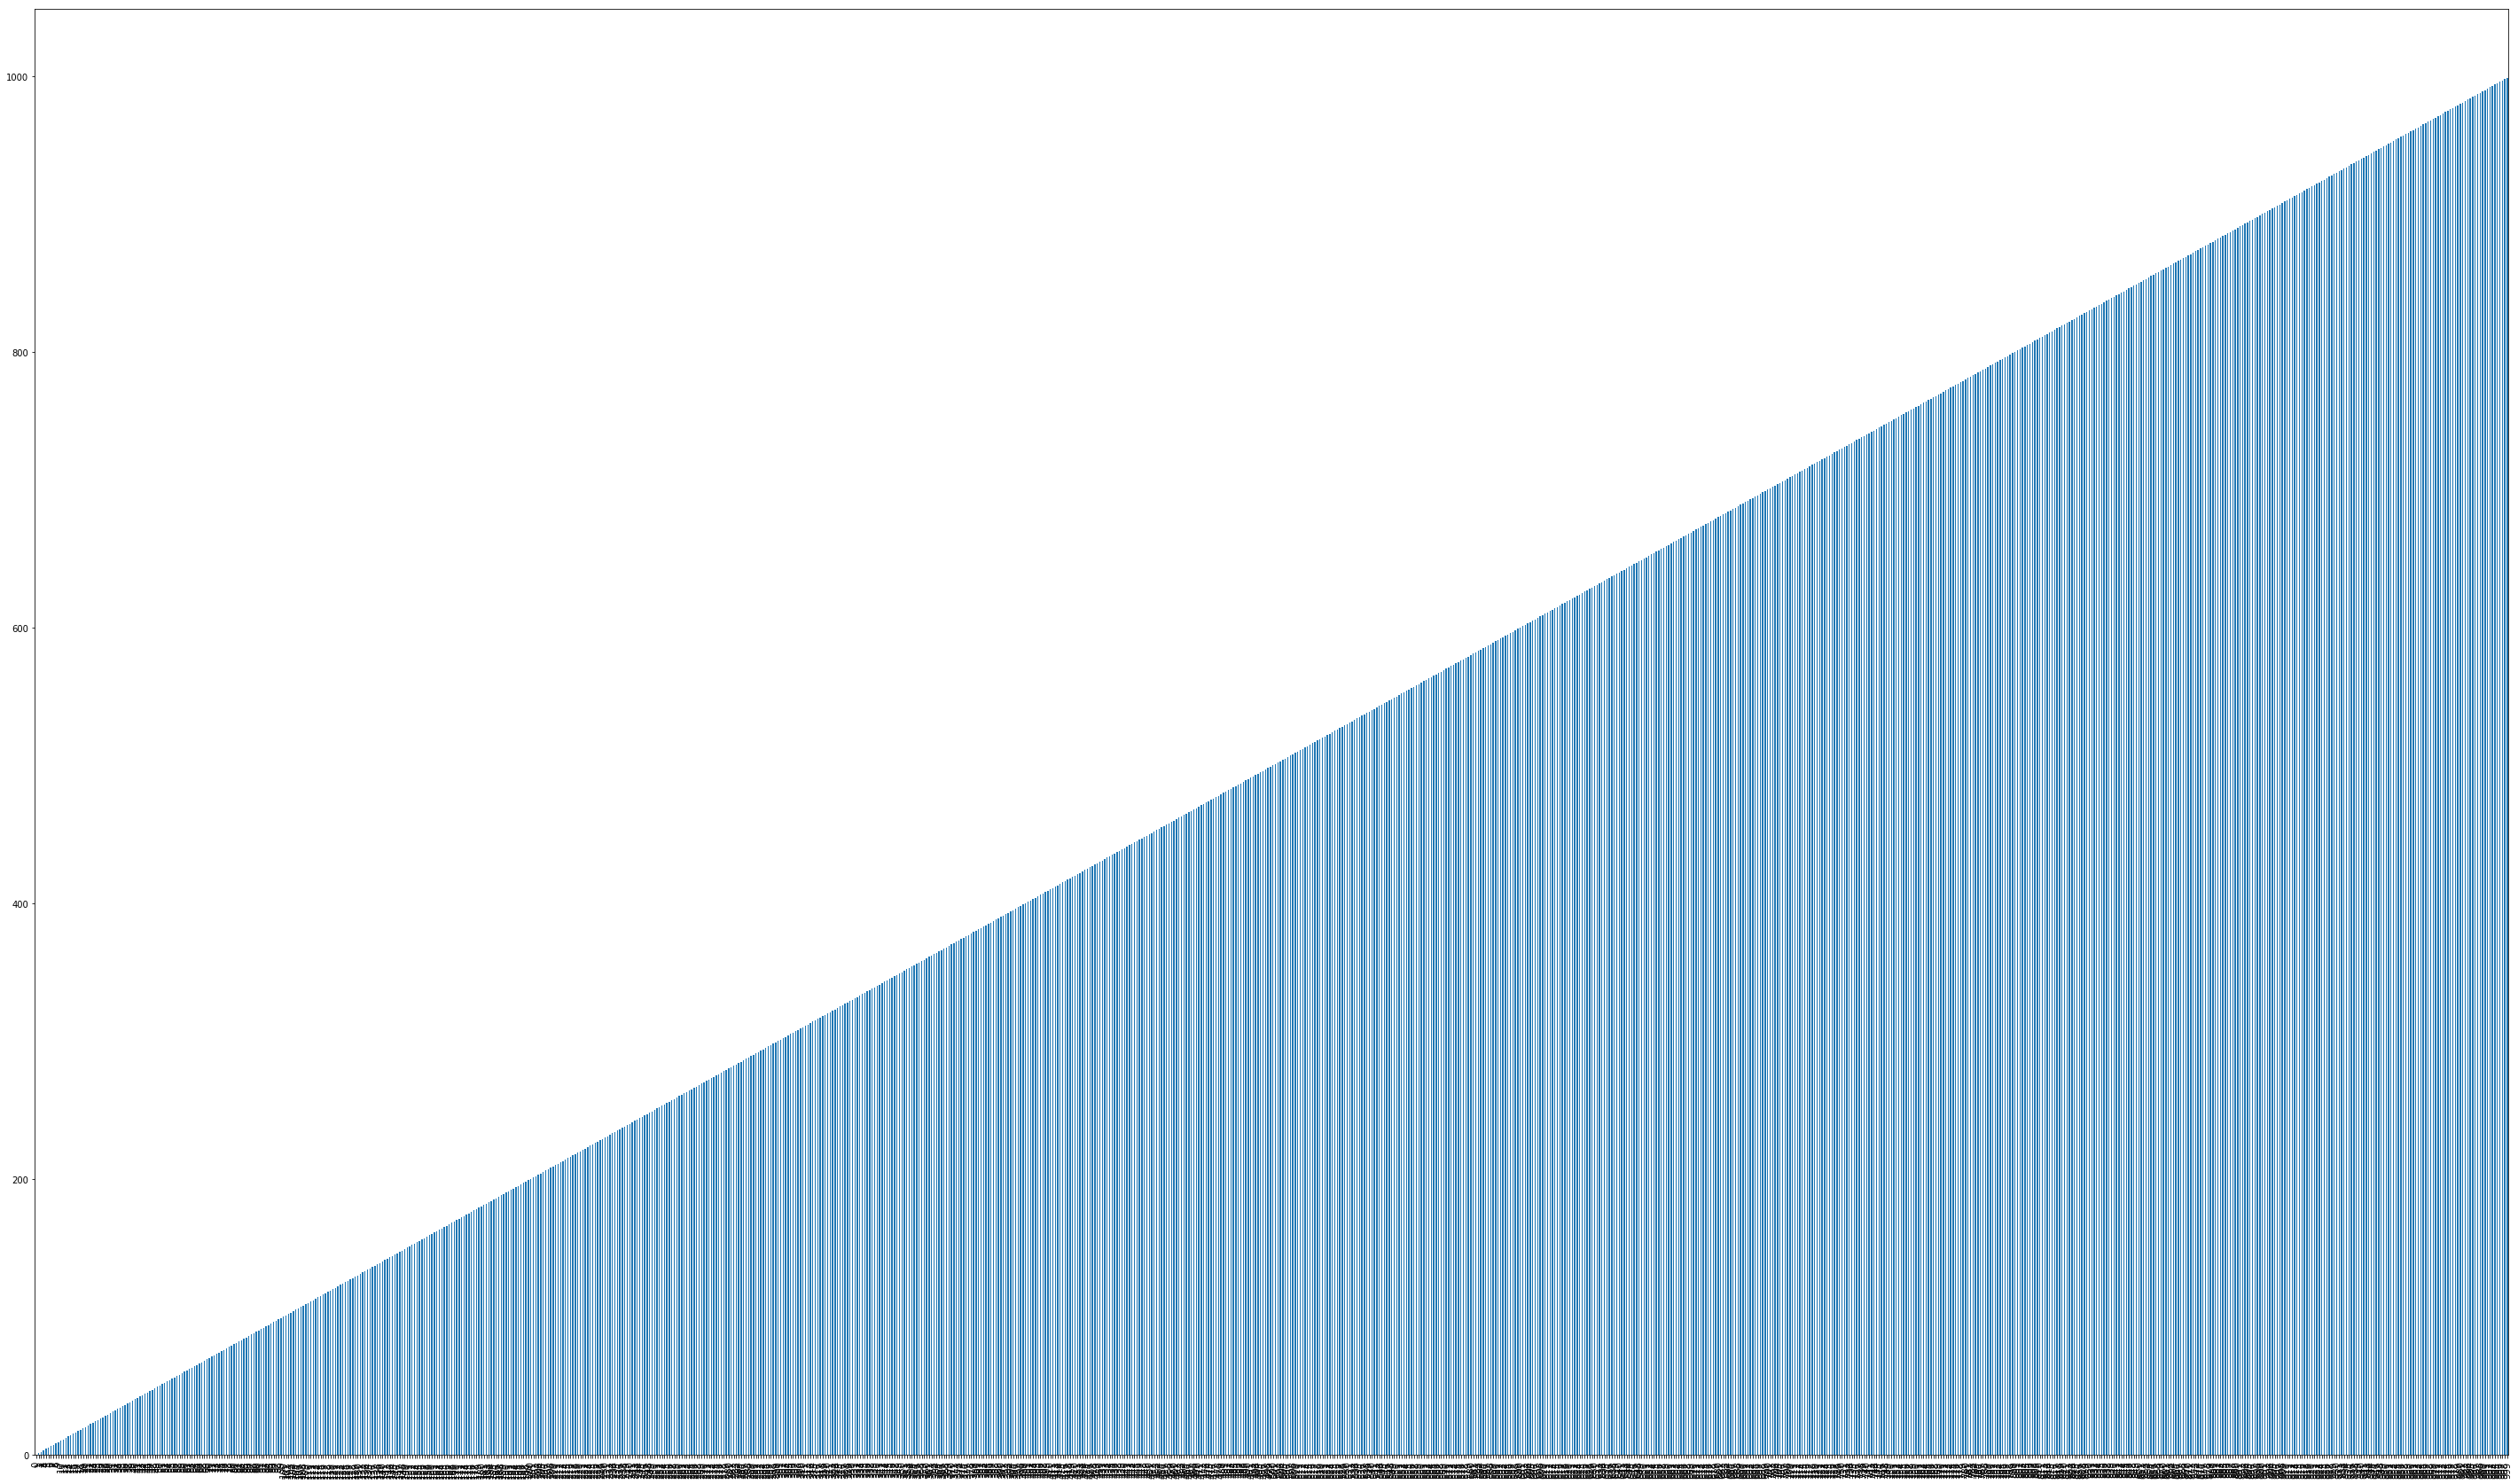

In [174]:
roll1["roll"].sort_values().plot(kind="bar", figsize=(50,30))

In [175]:
mean_normal(roll1["value"])

3.447

In [178]:
freq_df1 = roll1['value'].value_counts()
freq_df1 = pd.DataFrame(data = freq_df1).sort_index()
freq_df1

,value
1,175
2,167
3,175
4,168
5,149
6,166


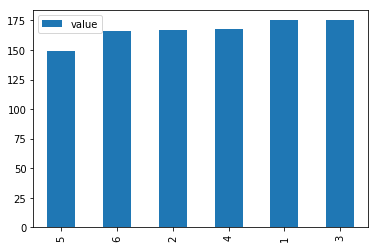

In [179]:
freq_df1[["value"]].sort_values(by='value').plot(kind="bar")

Probability of throwing any number in dice is equaly likely. 
The bigger the sample the closer it is getting to having even distribution

#### Challenge 4

In the ages_population files, we will find some information about a poll we did to a thousand people. Each file corresponds to a different neighbourhood.

Read the csv ages_population.csv. Here you have a poll we did to people from here in Barcelona about their ages. You will find each observation in the csv.

Calculate the frequency distribution and plot it as we did during the lesson. Define a range for the mean and std with the eye.
Calculate the mean and the standard deviation and compare it with your range. Does it fit?
Now read the csv ages_population2.csv and calculate the frequency distribution and plot it.
What do you see? Is there any difference?
Calculate the mean and std and compare with the last one. What do you think?

In [193]:
ages = pd.read_csv("ages_population.csv")

In [194]:
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [198]:
freq_age = ages['observation'].value_counts()
freq_age = pd.DataFrame(data = freq_age).sort_index().reset_index().rename(columns={'index': 'age'})
freq_age

,age,observation
0,1.0,2
1,2.0,2
2,4.0,1
3,5.0,2
4,6.0,2
5,7.0,1
6,8.0,5
7,9.0,2
8,10.0,3
9,11.0,3


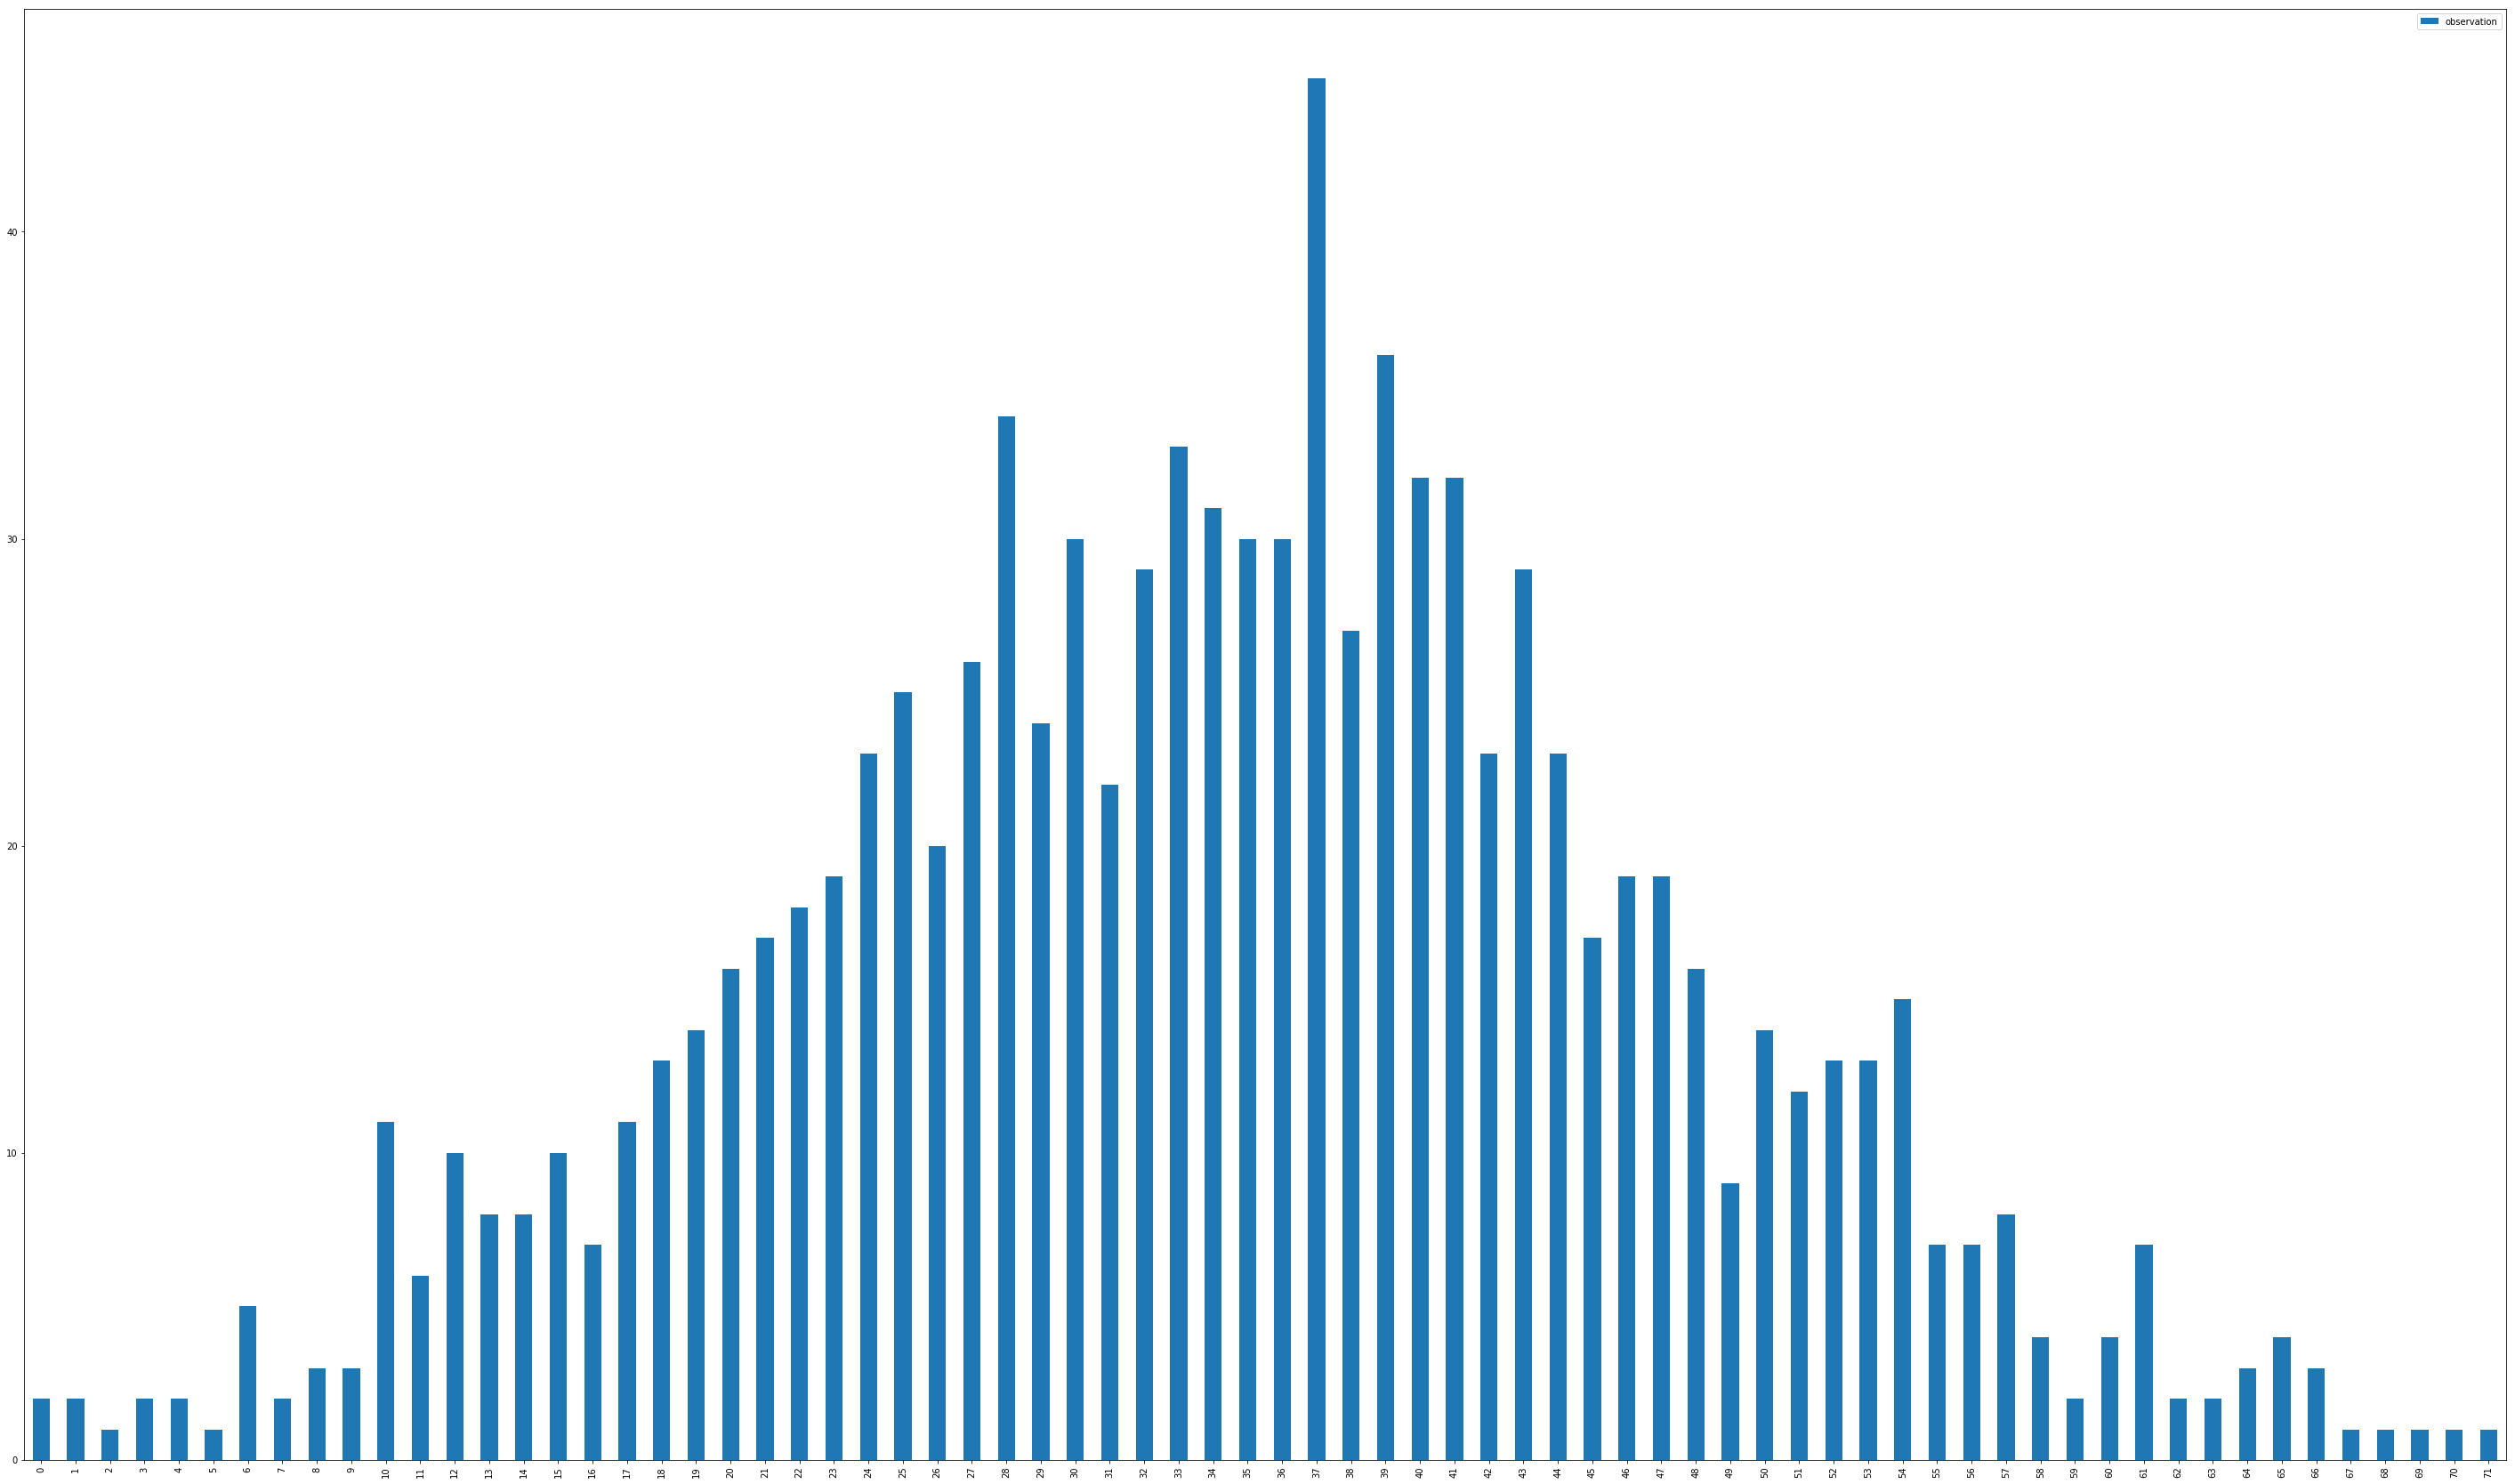

In [199]:
freq_age[['observation']].plot(kind='bar', figsize=(50,30))

In [200]:
poss_ages = pd.DataFrame(data = {'age': pd.Series(range(100))})
poss_ages

,age
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


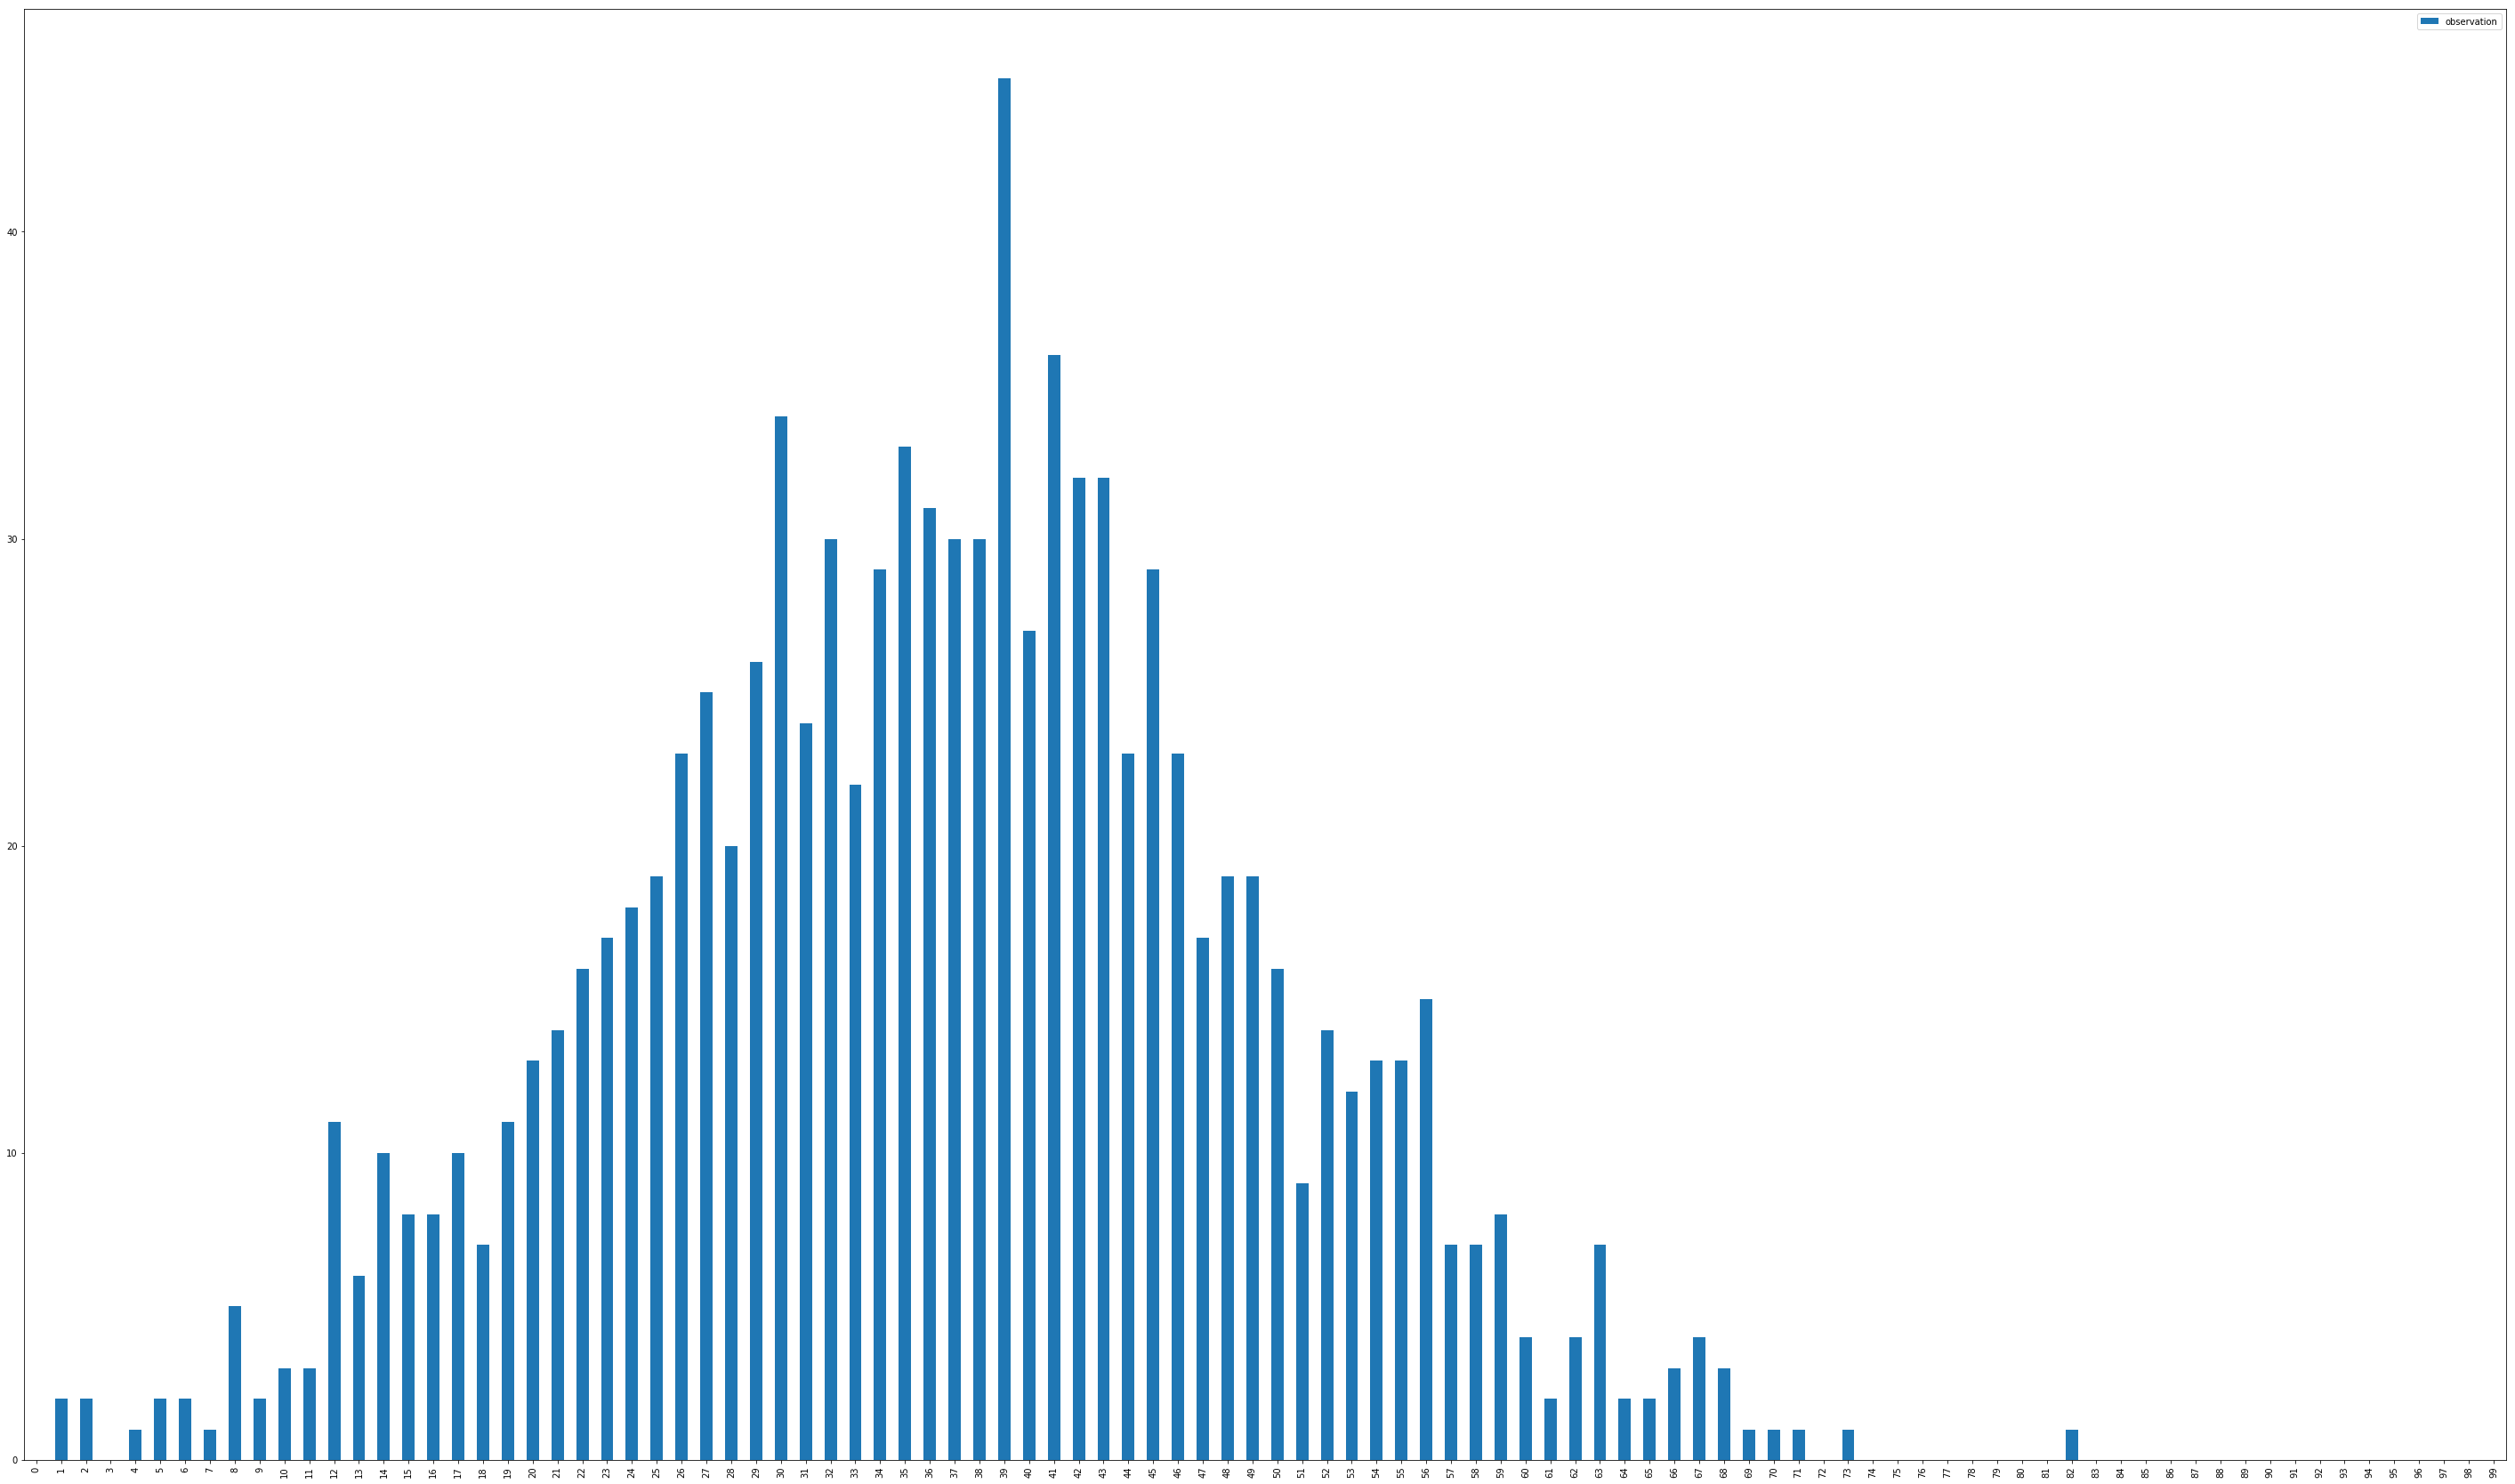

In [201]:
poss_ages = pd.DataFrame(data = {'age': pd.Series(range(100))})
poss_ages.merge(freq_age, how='left').fillna(0)[['observation']].plot(kind='bar', figsize=(50,30))


In [205]:
freq_age.mean()

age            37.611111
observation    13.888889
dtype: float64

In [206]:
freq_age.std()

age            21.239450
observation    11.261996
dtype: float64

In [207]:
ages1 = pd.read_csv("ages_population2.csv")

In [208]:
freq_age1 = ages1['observation'].value_counts()
freq_age1 = pd.DataFrame(data = freq_age1).sort_index().reset_index().rename(columns={'index': 'age'})
freq_age1

,age,observation
0,19.0,3
1,20.0,13
2,21.0,17
3,22.0,35
4,23.0,41
5,24.0,78
6,25.0,98
7,26.0,120
8,27.0,125
9,28.0,139


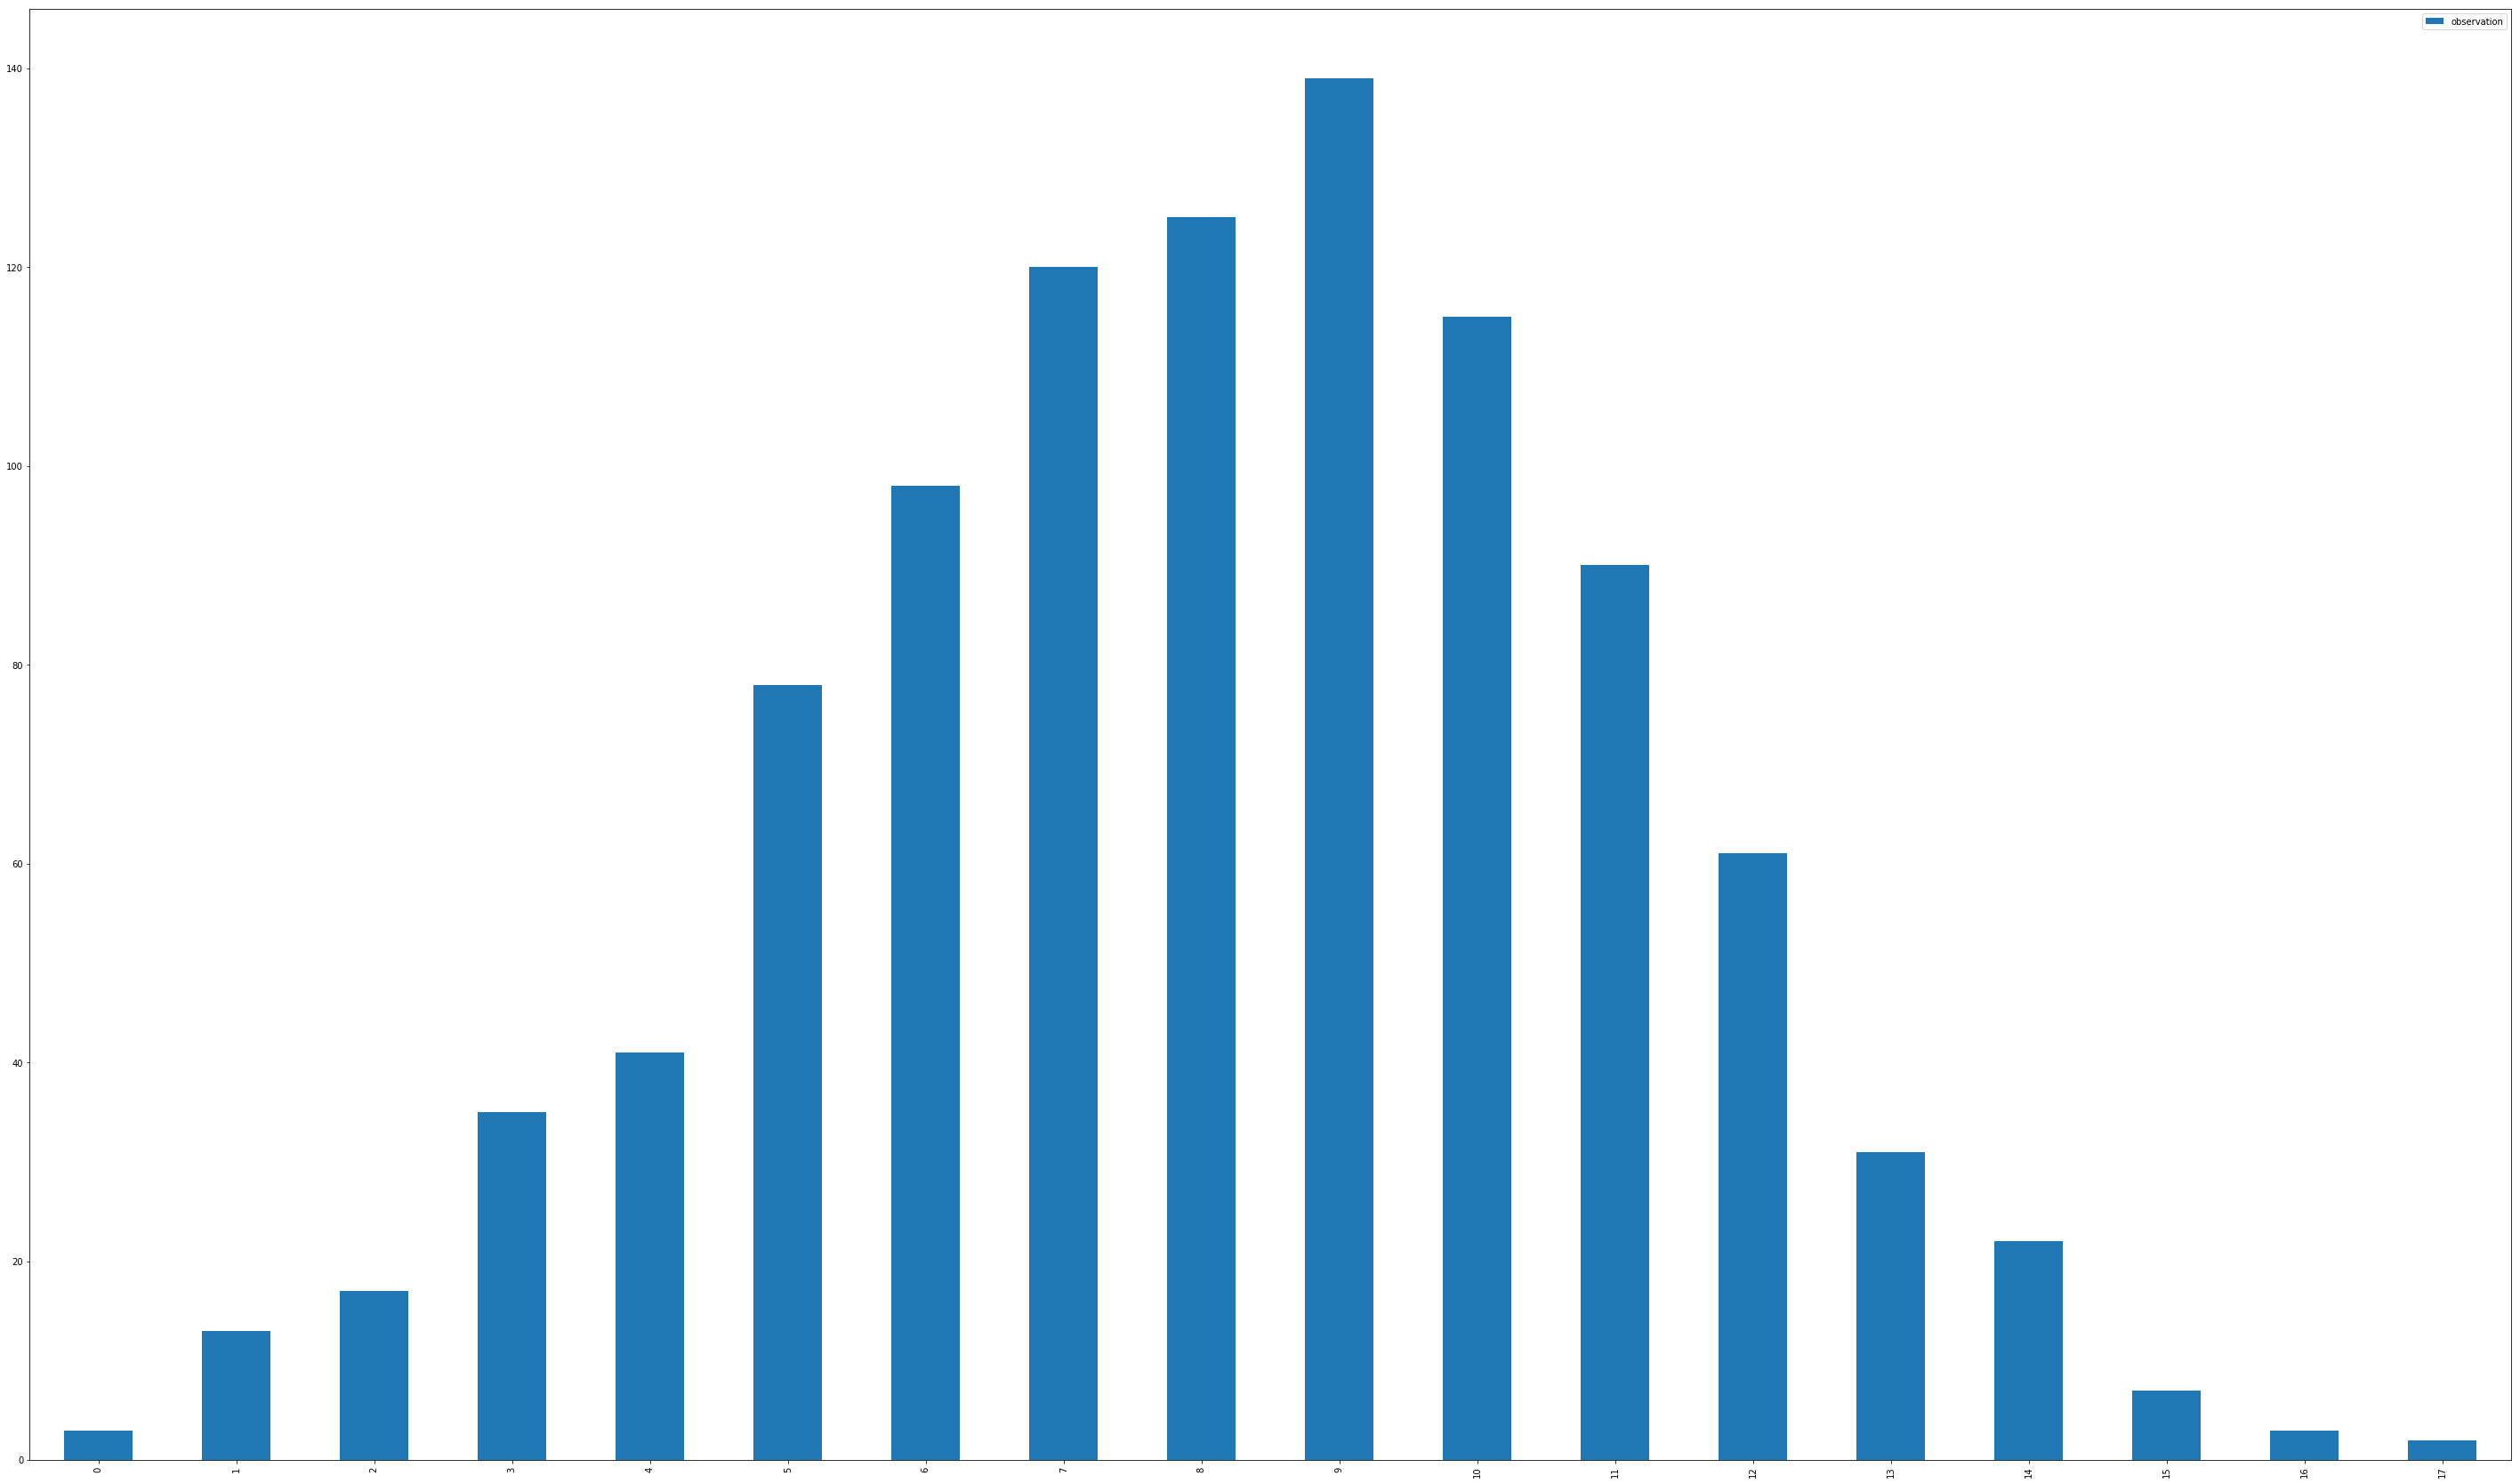

In [209]:
freq_age1[['observation']].plot(kind='bar', figsize=(50,30))

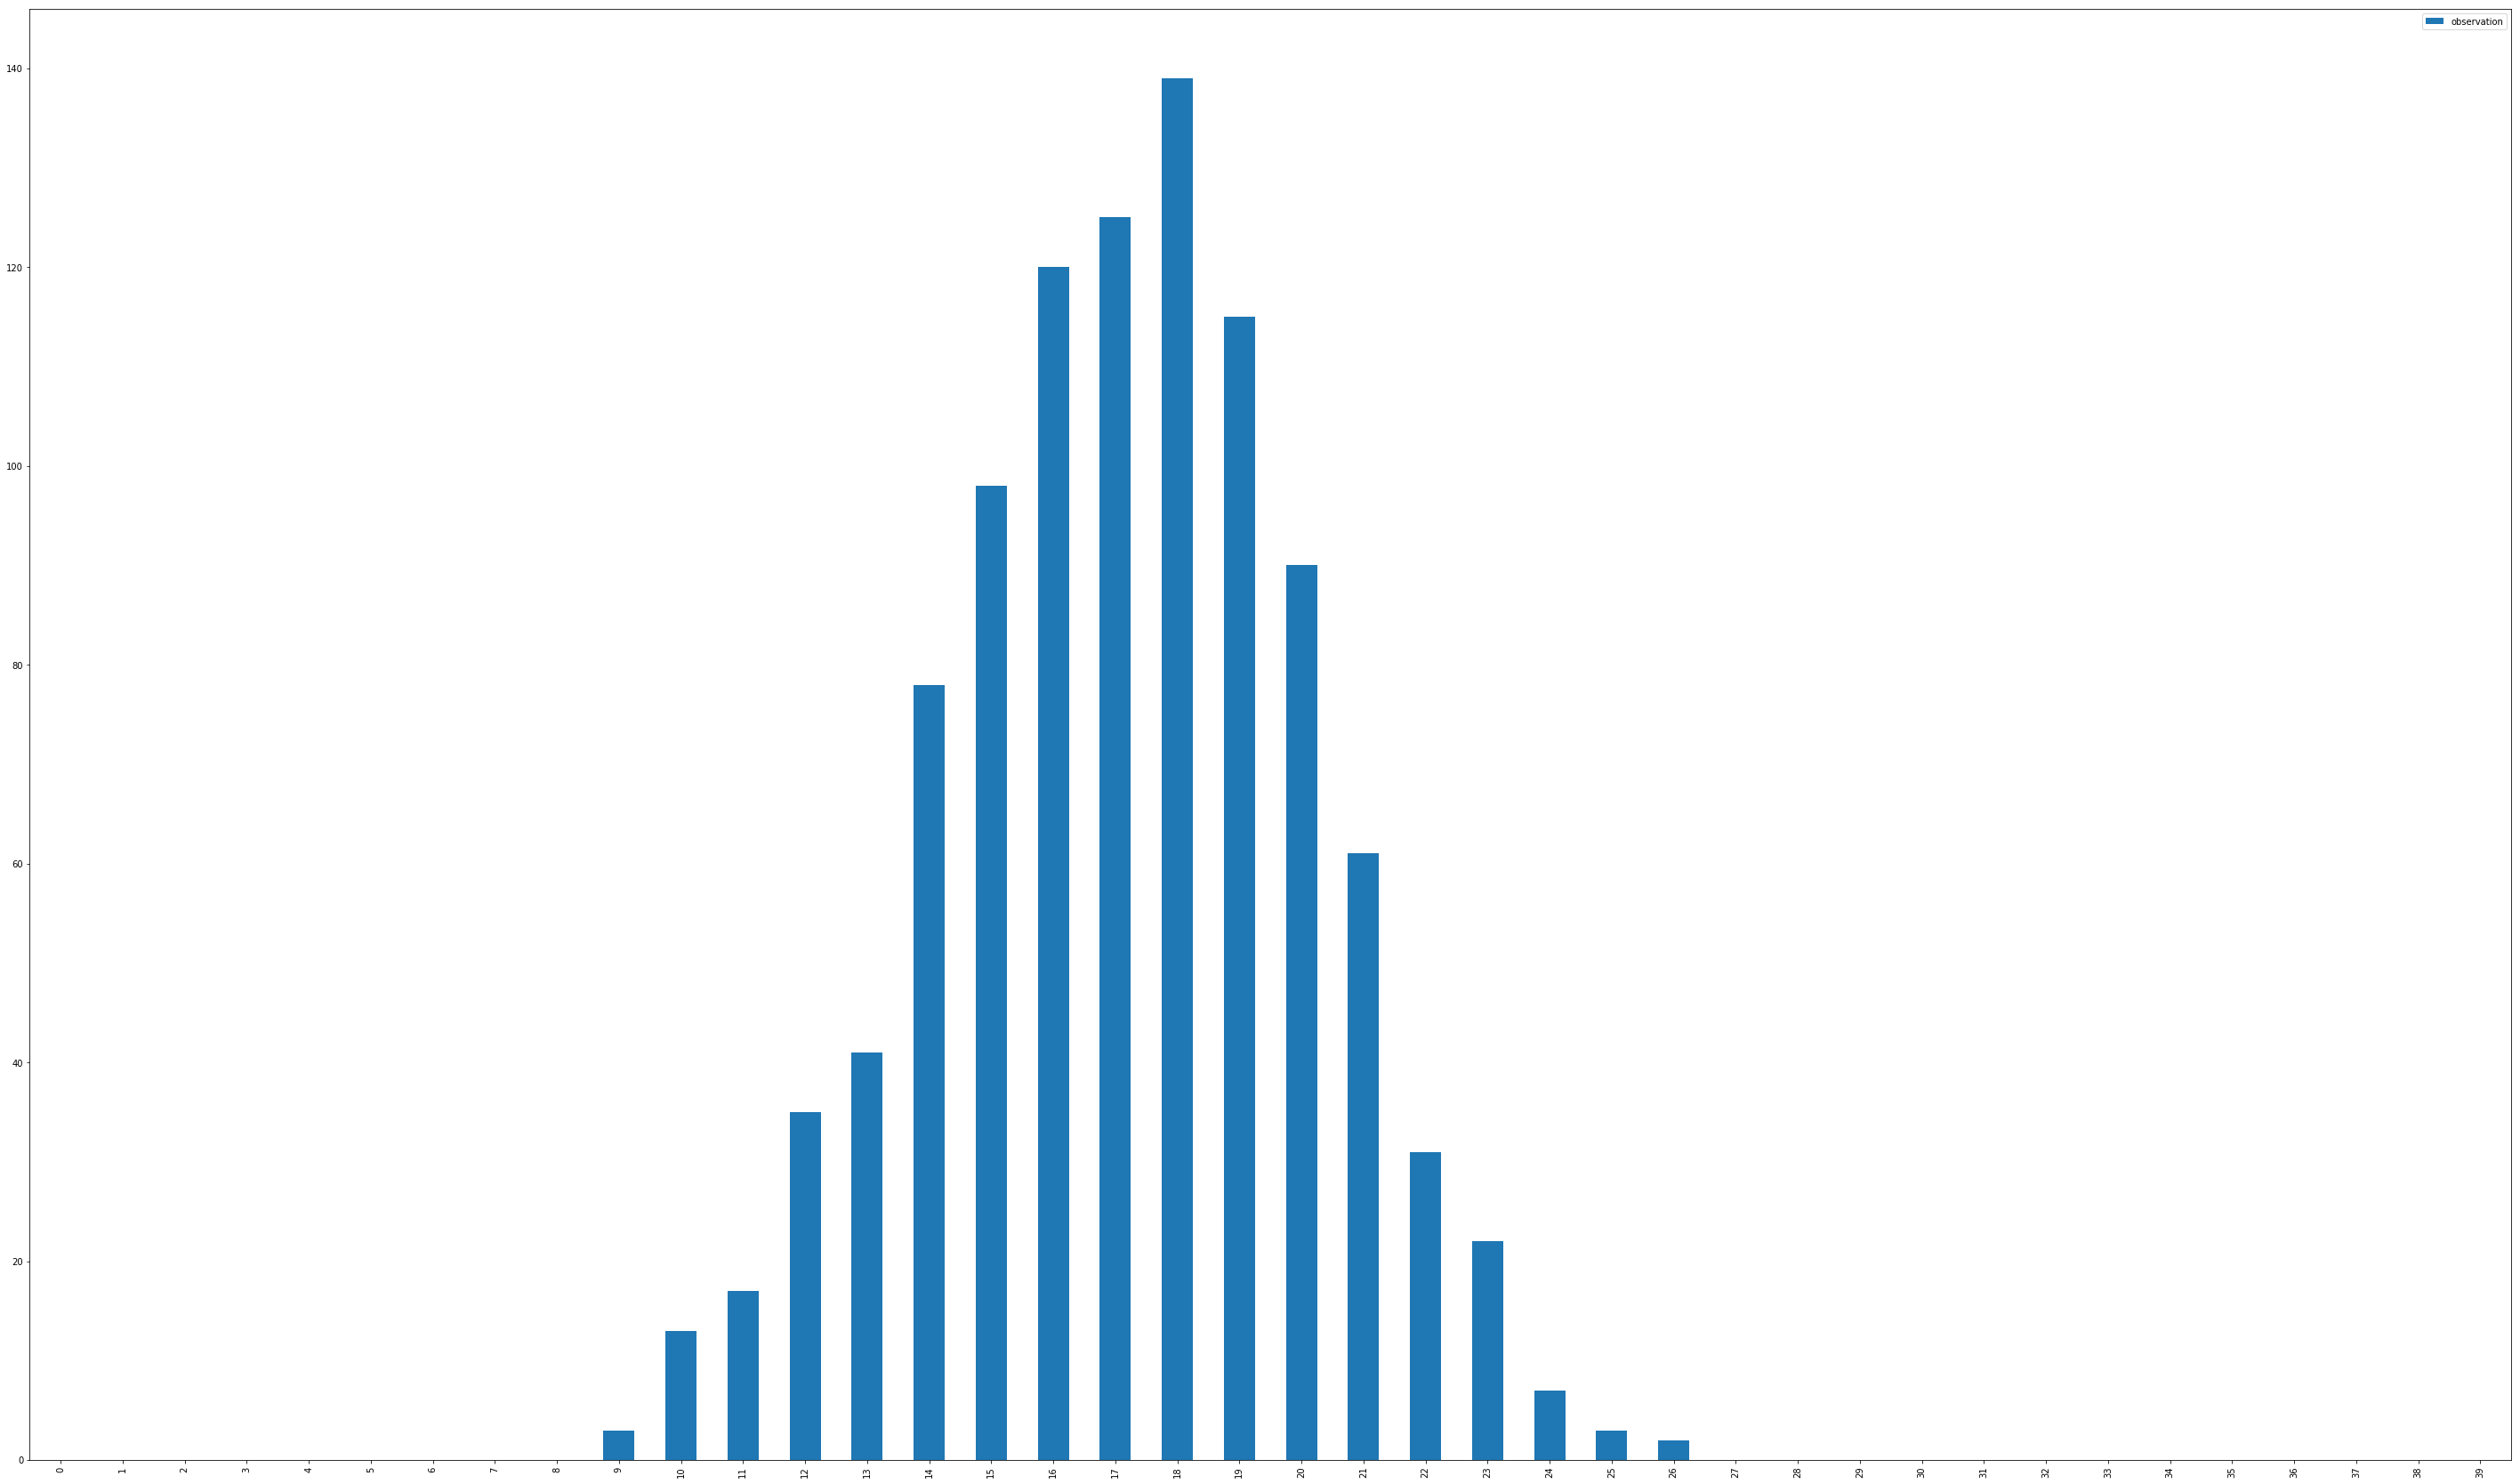

In [214]:
poss_ages1 = pd.DataFrame(data = {'age': pd.Series(range(10,50))})
poss_ages1.merge(freq_age1, how='left').fillna(0)[['observation']].plot(kind='bar', figsize=(50,30))

In [215]:
freq_age1.mean()

age            27.500000
observation    55.555556
dtype: float64

In [216]:
freq_age1.std()

age             5.338539
observation    48.144662
dtype: float64

Age mean of the second file is lower and standard deviation smaller. Data is less spread out

#### Challenge 5

Now is the turn of ages_population3.csv.

Calculate the frequency distribution and plot it as we did during the lesson.
Calculate the mean and std and compare with the plot. What is happening?
Calculate the four quartiles and give some arguments for the last question using them. How much difference there is between median and mean?
Calculate some other percentiles that can be useful to give more arguments.

In [217]:
ages2 = pd.read_csv("ages_population3.csv")

In [218]:
freq_age2 = ages2['observation'].value_counts()
freq_age2 = pd.DataFrame(data = freq_age2).sort_index().reset_index().rename(columns={'index': 'age'})
freq_age2

,age,observation
0,1.0,1
1,2.0,2
2,4.0,2
3,5.0,1
4,7.0,1
5,8.0,1
6,9.0,1
7,10.0,2
8,11.0,2
9,12.0,4


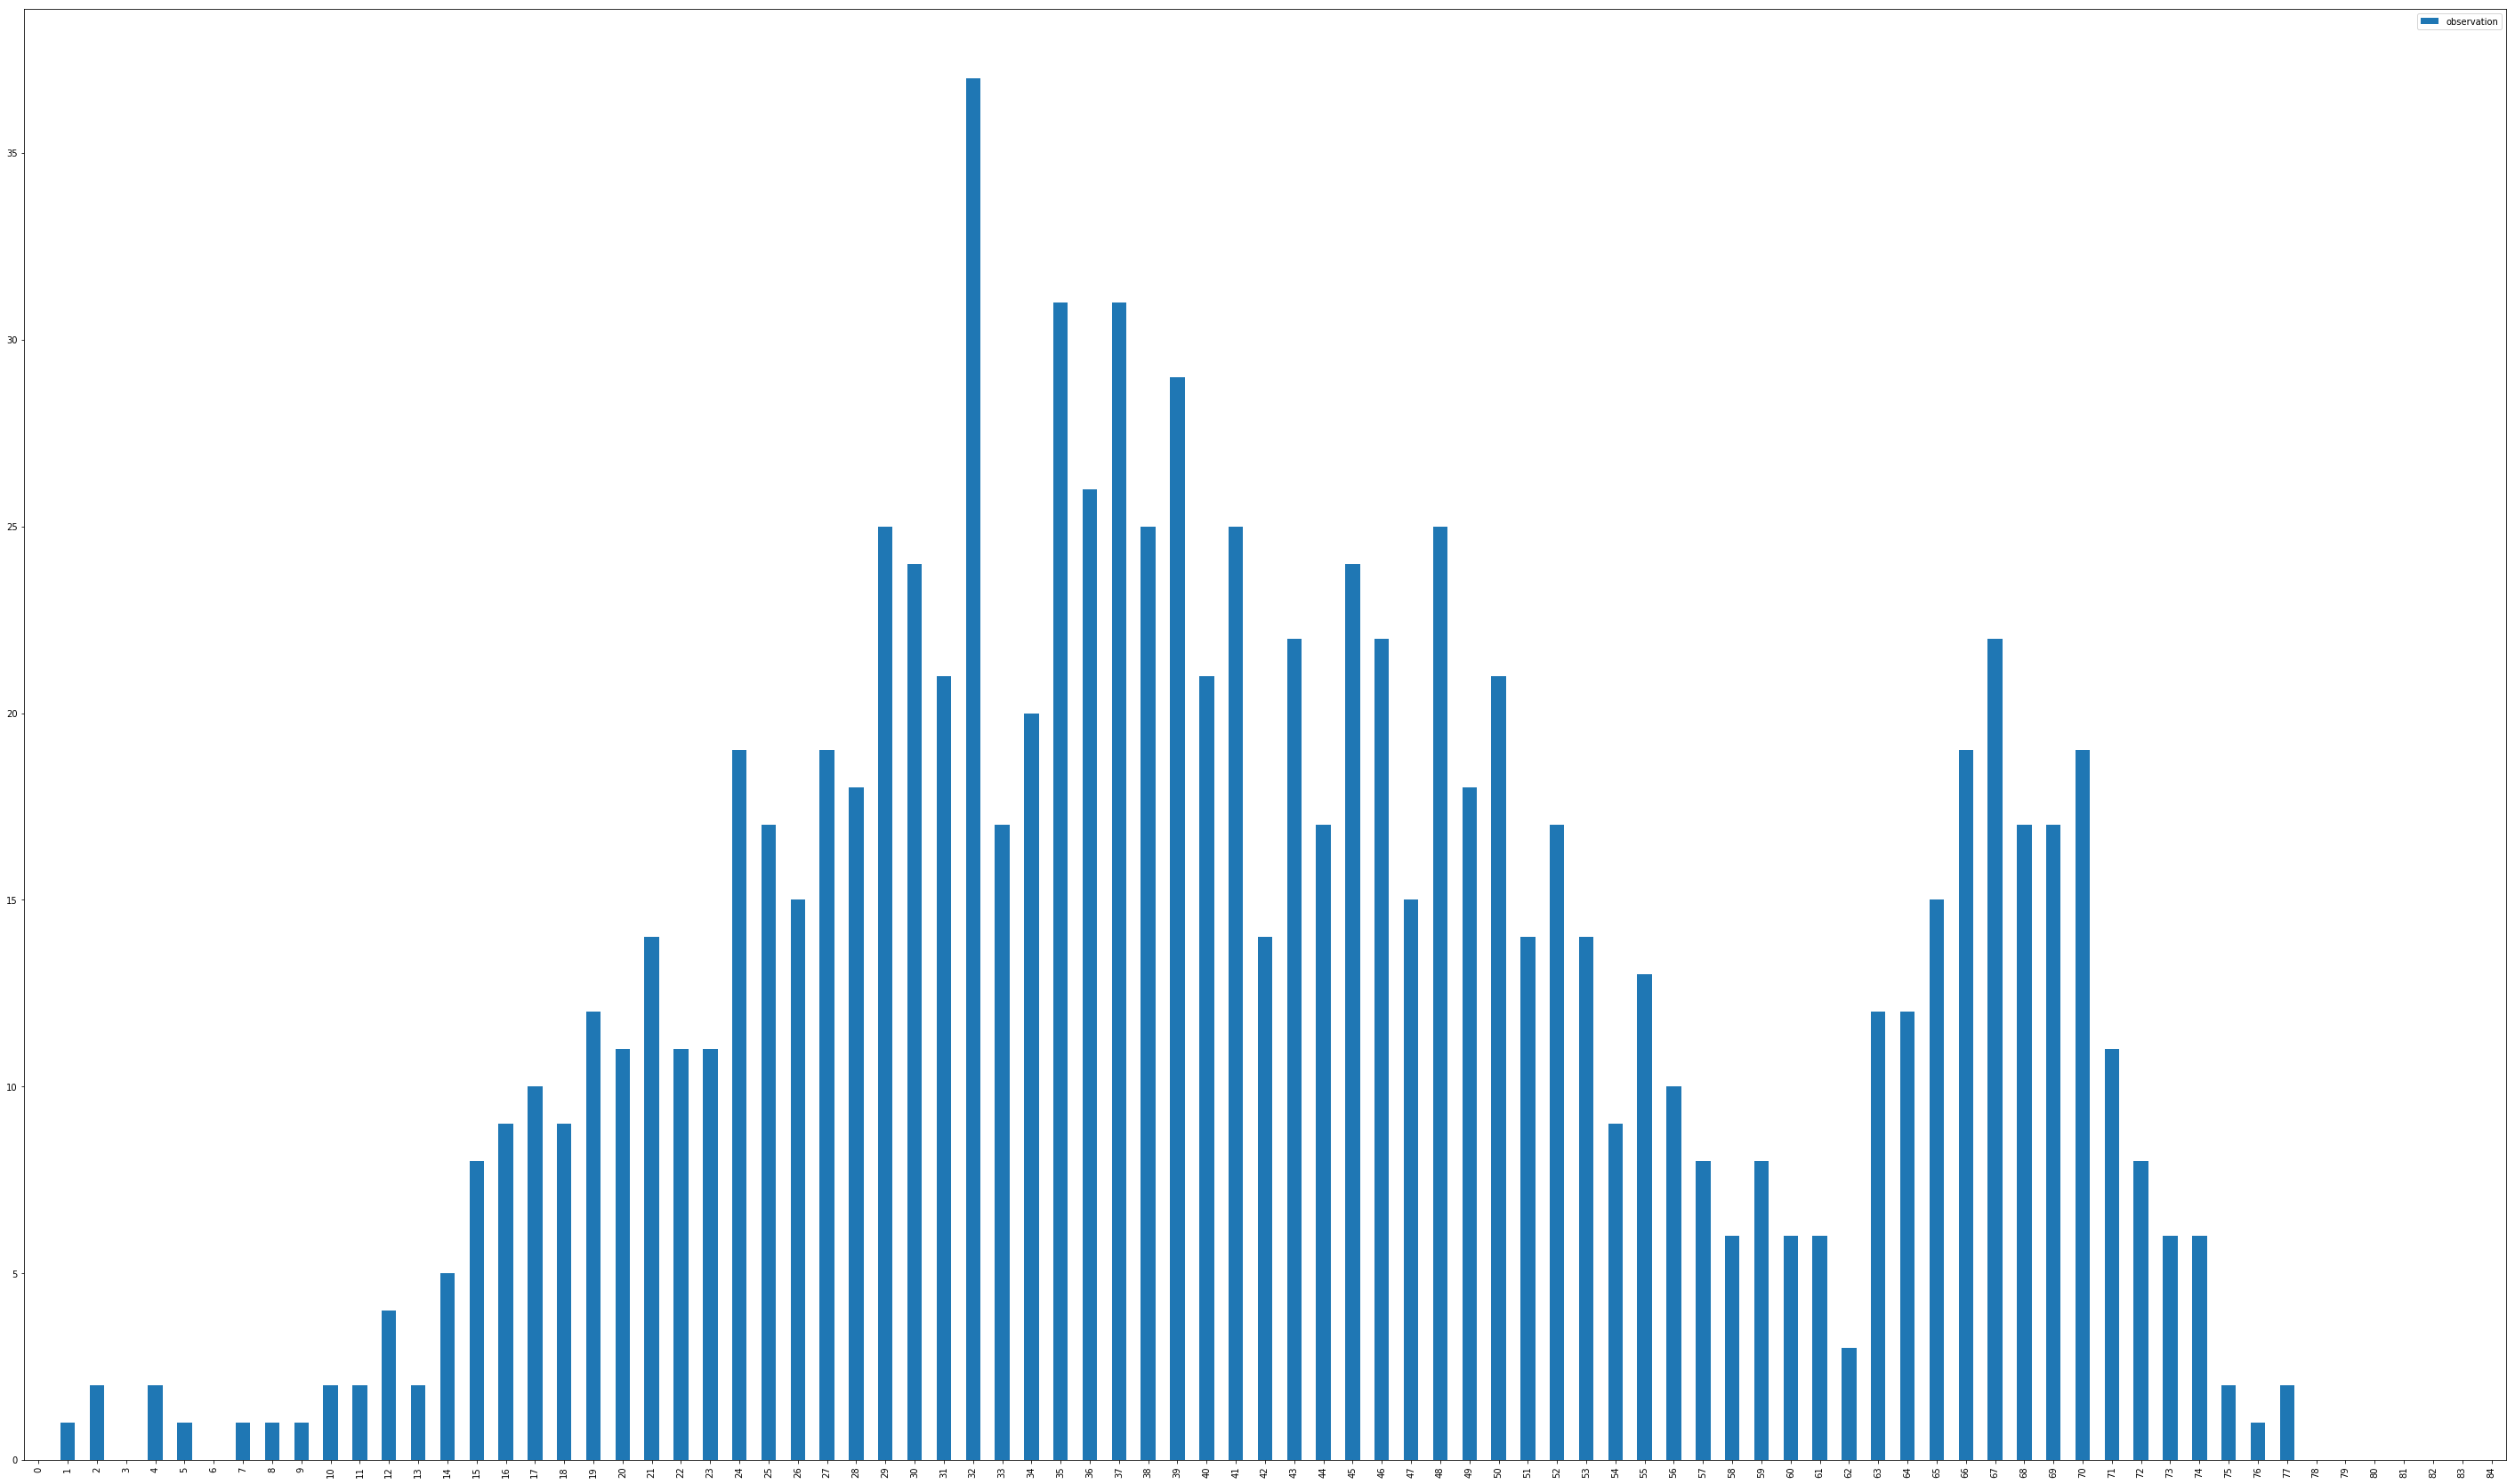

In [221]:
poss_ages2 = pd.DataFrame(data = {'age': pd.Series(range(85))})
poss_ages2.merge(freq_age2, how='left').fillna(0)[['observation']].plot(kind='bar', figsize=(50,30))

In [222]:
freq_age2.mean()

age            39.920000
observation    13.333333
dtype: float64

In [223]:
freq_age2.std()

age            21.930332
observation     8.726061
dtype: float64

In [224]:
freq_age2.describe()

,age,observation
count,75.000000,75.000000
mean,39.920000,13.333333
std,21.930332,8.726061
min,1.000000,1.000000
25%,21.500000,6.000000
50%,40.000000,13.000000
75%,58.500000,19.000000
max,77.000000,37.000000
